In [20]:
%pip install tensorflow opencv-python scikit-learn matplotlib ipywidgets seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl (9.7 MB)
Using cached tzdata-2025.3-py2.py3-none-any.whl (348 kB)

   ---------------------------------------- 0/3 [tzdata]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pand


[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, classification_report

from IPython.display import display
import ipywidgets as widgets


In [3]:
TRAIN_DIR = "dataset/train"
TEST_DIR  = "dataset/test"

IMG_SIZE = 120

print(os.listdir(TRAIN_DIR))
print(os.listdir(TEST_DIR))

['fist', 'index-left', 'index-right', 'no-gesture', 'palm', 'thumbs-down', 'thumbs-up']
['fist', 'index-left', 'index-right', 'no-gesture', 'palm', 'thumbs-down', 'thumbs-up']


In [5]:
def load_dataset(folder_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder_path))

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)

        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            img = img / 255.0
            img = img.reshape(IMG_SIZE, IMG_SIZE, 1)

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

In [6]:
X_train, y_train, class_names = load_dataset(TRAIN_DIR)
X_test, y_test, _ = load_dataset(TEST_DIR)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)
print("Classes:", class_names)

Training samples: (448, 120, 120, 1)
Testing samples: (112, 120, 120, 1)
Classes: ['fist', 'index-left', 'index-right', 'no-gesture', 'palm', 'thumbs-down', 'thumbs-up']


In [7]:
model = Sequential([
    Input(shape=(120, 120, 1)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

In [8]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442,375 (24.58 MB)

 Trainable params: 6,442,375 (24.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(X_test, y_test)
)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8438 - loss: 0.5990 - val_accuracy: 0.7054 - val_loss: 1.0124
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.9688 - loss: 0.0908 - val_accuracy: 0.9018 - val_loss: 0.5211
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9978 - loss: 0.0098 - val_accuracy: 0.8839 - val_loss: 0.4943
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 1.0000 - loss: 7.4933e-04 - val_accuracy: 0.8929 - val_loss: 0.4934
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 1.0000 - loss: 2.8825e-04 - val_accuracy: 0.8839 - val_loss: 0.4948
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 1.0000 - loss: 1.8668e-04 - val_accuracy: 0.8839 - val_loss: 0.5019
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 1.0000 - loss: 1.4713e-04 - val_accuracy: 0.8929 - val_loss: 0.5081
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 1.0000 - loss: 1.1937e-04 - val_

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred_classes))

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Confusion Matrix:

[[16  0  0  0  0  0  0]
 [ 0 16  0  0  0  0  0]
 [ 0  0 16  0  0  0  0]
 [ 0  0  0 16  0  0  0]
 [ 4  0  0  0 12  0  0]
 [ 0  0  0  0  0 16  0]
 [ 0  0  0  0  8  0  8]]

Classification Report:

              precision    recall  f1-score   support

        fist       0.80      1.00      0.89        16
  index-left       1.00      1.00      1.00        16
 index-right       1.00      1.00      1.00        16
  no-gesture       1.00      1.00      1.00        16
        palm       0.60      0.75      0.67        16
 thumbs-down       1.00      1.00      1.00        16
   thumbs-up       1.00      0.50      0.67        16

    accuracy                           0.89       112
   macro avg       0.91      0.89      0.89       112
weighted avg       0.91      0.89      0.89       112



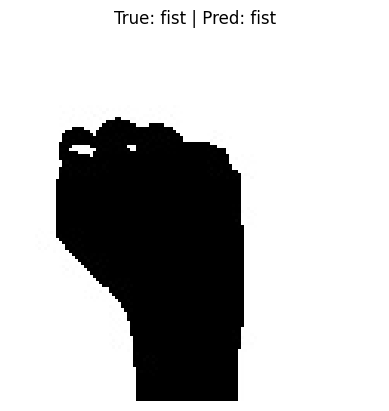

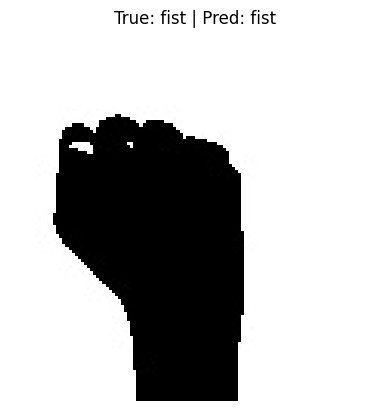

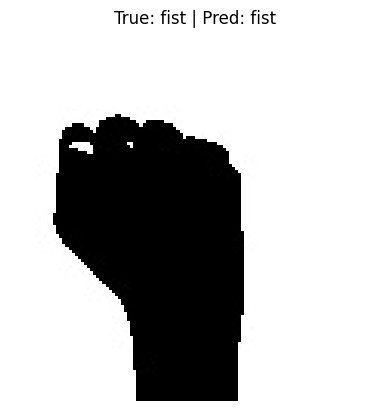

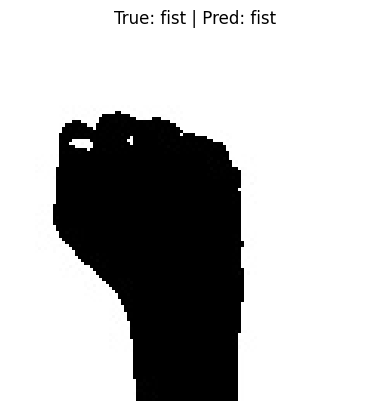

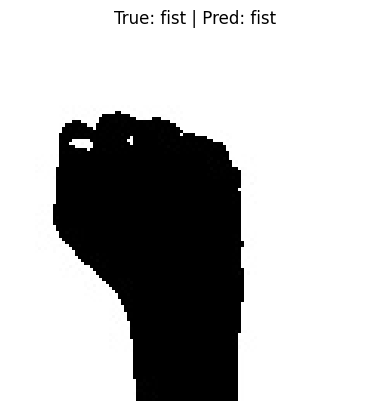

In [11]:
for i in range(5):
    plt.imshow(X_test[i].reshape(120,120), cmap='gray')
    plt.title(
        f"True: {class_names[y_true[i]]} | "
        f"Pred: {class_names[y_pred_classes[i]]}"
    )
    plt.axis('off')
    plt.show()

In [14]:
def test_widget_upload(uploaded_file):
    if not uploaded_file.value:
        print("❌ No image uploaded")
        return

    CONFIDENCE_THRESHOLD = 0.80

    # uploaded_file.value is a TUPLE of file dictionaries
    for fileinfo in uploaded_file.value:
        filename = fileinfo.get('name', 'uploaded_image')
        print(f"Processing: {filename}")

        content = fileinfo['content']
        npimg = np.frombuffer(content, np.uint8)
        img = cv2.imdecode(npimg, cv2.IMREAD_GRAYSCALE)

        if img is None:
            print("⚠️ Invalid image")
            return

        # Preprocessing (same as training)
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_norm = img_resized / 255.0
        img_input = img_norm.reshape(1, IMG_SIZE, IMG_SIZE, 1)

        prediction = model.predict(img_input, verbose=0)
        pred_index = np.argmax(prediction)
        pred_label = class_names[pred_index]
        confidence = np.max(prediction)

        if confidence < CONFIDENCE_THRESHOLD:
            final_label = "uncertain / ambiguous gesture"
        else:
            final_label = pred_label

        plt.imshow(img_resized, cmap='gray')
        plt.axis('off')
        plt.title(
            f"Detected: {final_label}\n"
            f"Confidence: {confidence*100:.2f}%"
        )
        plt.show()

In [15]:
upload = widgets.FileUpload(accept='image/*', multiple=False)
display(upload)


FileUpload(value=(), accept='image/*', description='Upload')

Processing: 04_thumbs-down_65.jpg


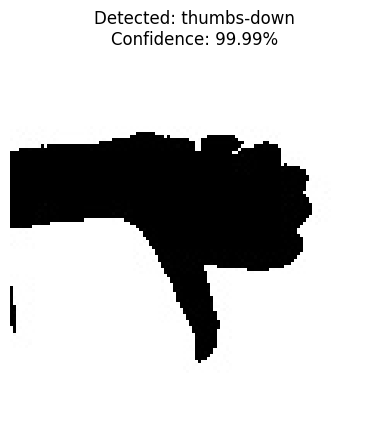

In [16]:
test_widget_upload(upload)

## Training Parameters

*   **Epochs**: 20
*   **Batch Size**: 16
*   **Optimizer**: Adam

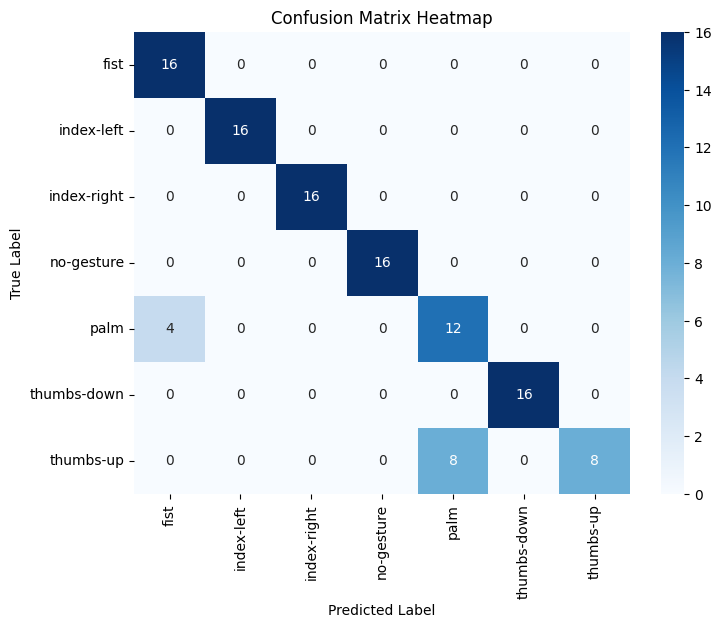

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    confusion_matrix(y_true, y_pred_classes),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

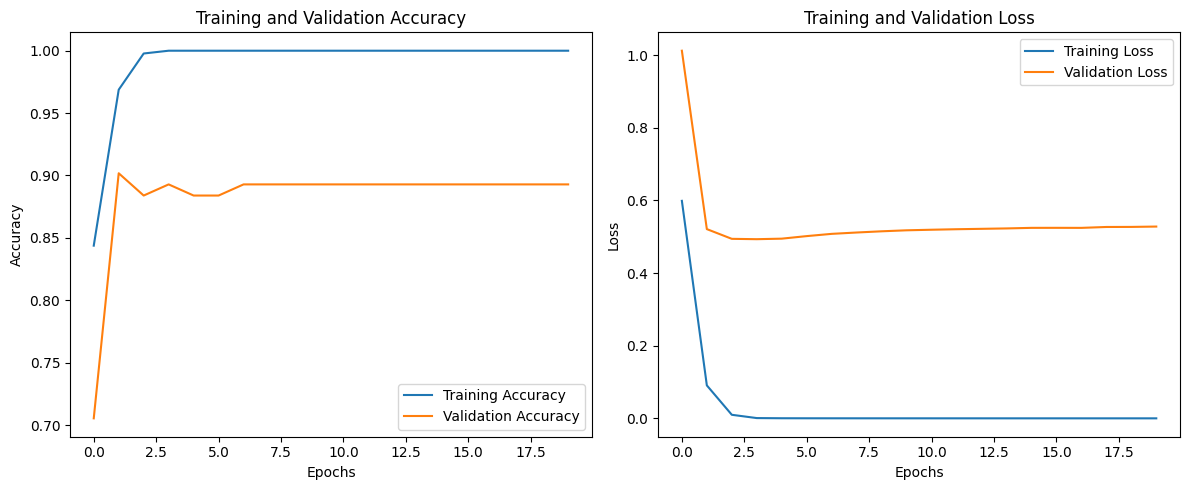

In [22]:
plt.figure(figsize=(12, 5))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
report_dict = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
print("Classification report dictionary generated.")

Classification report dictionary generated.


In [32]:
df_report = pd.DataFrame(report_dict).transpose()
print("DataFrame created from classification report.")

DataFrame created from classification report.


In [33]:
df_plot = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])
df_plot = df_plot[['precision', 'recall', 'f1-score']]
print("DataFrame cleaned and relevant columns selected.")
print(df_plot.head())

DataFrame cleaned and relevant columns selected.
             precision  recall  f1-score
fist               0.8    1.00  0.888889
index-left         1.0    1.00  1.000000
index-right        1.0    1.00  1.000000
no-gesture         1.0    1.00  1.000000
palm               0.6    0.75  0.666667


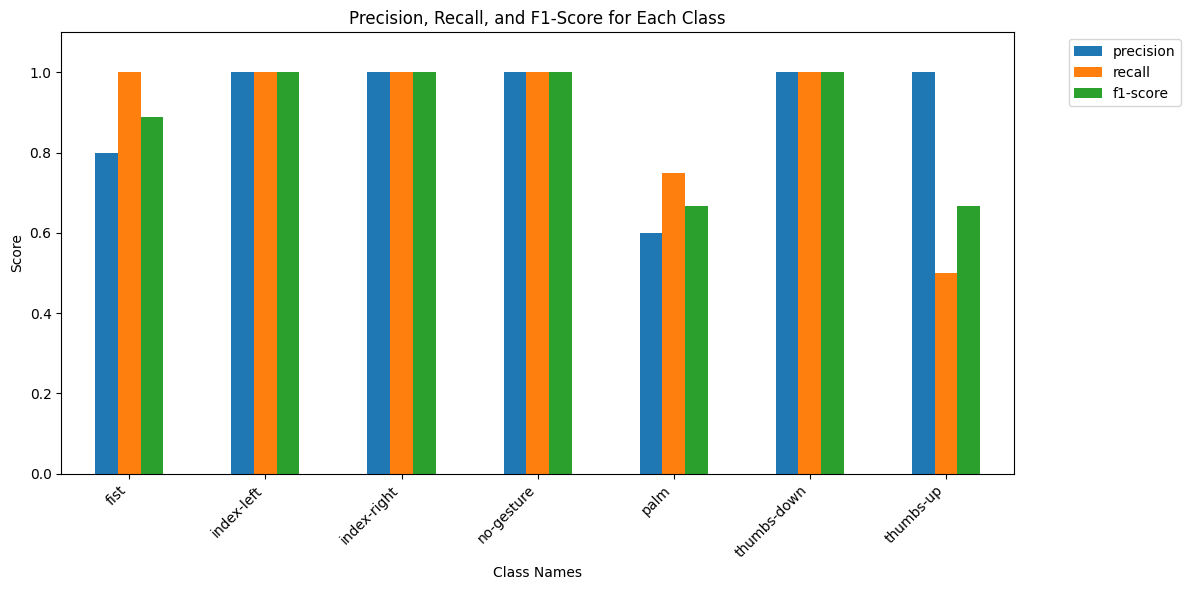

In [34]:
df_plot.plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-Score for Each Class')
plt.xlabel('Class Names')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()